In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import skew, kurtosis, zscore

In [2]:
df = pd.read_csv('data/World Energy Consumption.csv')

In [3]:
asean_countries = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 
                    'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
features = {'country', 'population', 'gdp', 'biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'oil_consumption', 'wind_consumption', 'other_renewable_consumption', 'solar_consumption'}
choices = {'population', 'gdp', 'biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'oil_consumption', 'wind_consumption', 'other_renewable_consumption', 'solar_consumption'}

In [4]:
asean_data = df[df["country"].isin(asean_countries)]
asean_data = asean_data[asean_data["year"] >= 2017]
asean_data = asean_data.loc[:, asean_data.columns.isin(features)]
asean_data.replace(np.nan, 0, inplace=True)

In [5]:
#Mean, Median, Mode etc.
def data_interpretation(data, feature):
    # Central Tendencies
    mean_of_data = data[feature].mean()
    median_of_data = data[feature].median()
    mode_of_data = data[feature].mode()[0]

    print("\nCentral Tendency Measures")
    print(f"Mean: {mean_of_data: .4f}")
    print(f"Median: {median_of_data: .4f}")
    print(f"Mode: {mode_of_data: .4f}")
    
    # Dispersion
    variance_of_data = data[feature].var()
    stddev_of_data = data[feature].std()
    range_of_data = data[feature].max() - data[feature].min()
    q1_of_data = data[feature].quantile(0.25)
    q3_of_data = data[feature].quantile(0.75)
    iqr_of_data = q3_of_data - q1_of_data

    print("\nMeasures of Dispersion")
    print(f"Variance: {variance_of_data: .4f}")
    print(f"Standard Deviation: {stddev_of_data: .4f}")
    print(f"Range: {range_of_data: .4f}")
    print(f"Interquartile Range: {iqr_of_data: .4f}")
    
    # Skewness
    skewness_of_data = skew(data[feature])
    kurtosis_of_data = kurtosis(data[feature], fisher=False)

    print("\nSkewness and Kurtosis")
    print(f"Skewness: {skewness_of_data: .4f}")
    print(f"Kurtosis: {kurtosis_of_data: .4f}")

    # Outliers
    zscores = np.abs(zscore(data[feature]))
    outlier_indices = np.where(zscores > 2.5)[0]

    print("\nOutliers")
    print(outlier_indices)

In [6]:
def data_display(category, country):
    selected_data = asean_data[asean_data["country"] == country]
    
    print(f"Data of {country}")
    data_interpretation(selected_data, category)

In [7]:
def show_correlation_matrix():
    data = asean_data.loc[:, asean_data.columns != 'country']
    
    corr_matrix = data.corr()
    population_corr = corr_matrix["population"]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

In [8]:
def linear_regression(input_x, input_y, country, input):
    selected_data = asean_data[asean_data["country"] == country]
    
    X = selected_data[[input_x]]
    Y = selected_data[[input_y]]

    # Fit the model
    model = LinearRegression().fit(X, Y)
    predictions = model.predict(X)
    
    intercept = model.intercept_
    coef = model.coef_[0]
    r2score_corr = r2_score(Y, predictions)
    line = intercept + coef * selected_data[input_x]

    # Check if Correlation Value is above or at 50% or 35%
    if r2score_corr < 0.35:
        print("Correlation Value is less than 35%")
        return
    if r2score_corr > 0.5:
        print("Correlation Value is greater than 50%")

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=selected_data, x=input_x, y=input_y)

    # Add the regression line
    equation = f'{input_y} = {list(map('{:.2f}'.format, intercept))} + {list(map('{:.2f}'.format, coef))} * {input_x}'
    plt.plot(selected_data[input_x], line, 'r', label=equation)

    print(f"\nRegression equation for {input_x}:")
    print(equation)
    print(f"\nR-squared for {input_x}: {r2score_corr}")

    # Prediction
    input = float(input.replace(',',''))
    gdp_prediction = intercept + coef * input
    
    print(f"\nPredicted {input_y} based on input: {list(map('{:.2f}'.format, gdp_prediction))}")
    
    # Scatterplot
    plt.legend()
    plt.title(f"Regression of {input_x} on {input_y}")
    plt.grid(True)
    plt.show()

In [9]:
widgets.interact(data_display, category = choices, country = asean_countries)

interactive(children=(Dropdown(description='category', options=('fossil_fuel_consumption', 'solar_consumption'…

<function __main__.data_display(category, country)>

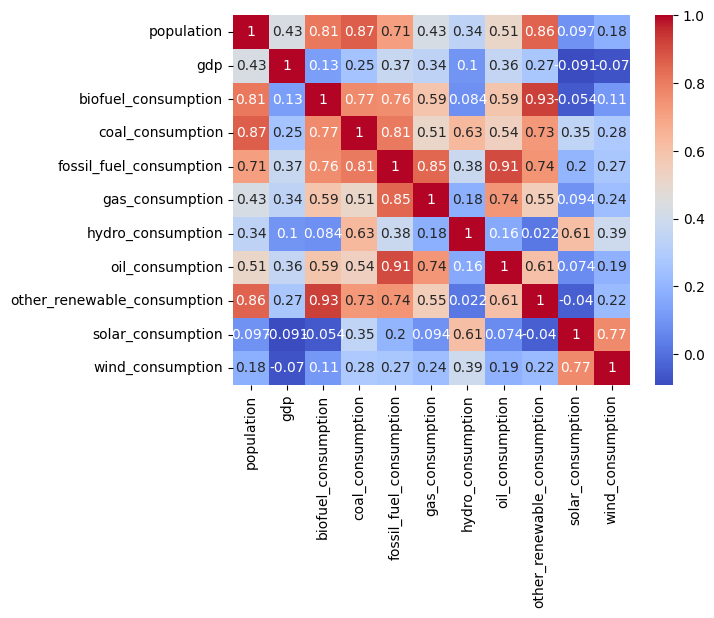

interactive(children=(Dropdown(description='input_x', options=('fossil_fuel_consumption', 'solar_consumption',…

<function __main__.linear_regression(input_x, input_y, country, input)>

In [10]:
show_correlation_matrix()
widgets.interact(linear_regression, input_x = choices, input_y = choices, country = asean_countries, input = '0')